In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../data/marketing_campaign.csv", sep=";")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
mnt_columns = ["MntWines", 
               "MntFruits", 
               "MntMeatProducts", 
               "MntFishProducts", 
               "MntSweetProducts", 
               "MntGoldProds"]

In [5]:
data["Age"] = 2024 - data.Year_Birth

## Task 1 (easy)

### Complains

In [6]:
data.Complain.sum()

21

### Average age

In [7]:
average_age = data.Age.mean()
average_age_customers = data[[
        any(item) for item in zip(*[data[name] != 0 for name in mnt_columns])
    ]].Age.mean()
print(f"average age: {round(average_age, 2)}, average age customers: {round(average_age_customers, 2)}")

average age: 55.19, average age customers: 55.19


## Task 2 (medium)

### Preprocessing

In [8]:
num_columns = ["Income",
               "Kidhome",
               "Teenhome",
               "Recency",
               "NumWebPurchases",
               "NumStorePurchases",           
               "Age"]

In [9]:
data[num_columns].head()

,Income,Kidhome,Teenhome,Recency,NumWebPurchases,NumStorePurchases,Age
0,58138.0,0,0,58,8,4,67
1,46344.0,1,1,38,1,2,70
2,71613.0,0,0,26,8,10,59
3,26646.0,1,0,26,2,4,40
4,58293.0,1,0,94,5,6,43


In [10]:
for name in num_columns:
    print(f"In {name} - {data[name].value_counts().shape[0]} unique values")

In Income - 1974 unique values
In Kidhome - 3 unique values
In Teenhome - 3 unique values
In Recency - 100 unique values
In NumWebPurchases - 15 unique values
In NumStorePurchases - 14 unique values
In Age - 59 unique values


### Clean data

In [11]:
print(f"Income >= 120000\t\t{sum(data['Income'] >= 120000)}")
print(f"Age >= 120000\t\t\t{sum(data['Age'] >= 100)}")
print(f"NumWebPurchases >= 120000\t{sum(data['NumWebPurchases'] >= 20)}")

prepare_data = data
prepare_data = prepare_data[prepare_data["Income"] < 120000]
prepare_data = prepare_data[prepare_data["Age"] < 100]
prepare_data = prepare_data[prepare_data["NumWebPurchases"] < 20]


Income >= 120000		8
Age >= 120000			3
NumWebPurchases >= 120000	4


### Covariane

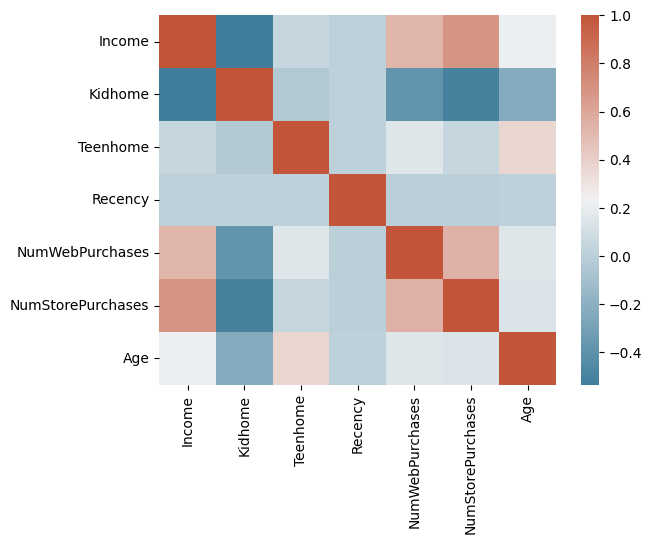

In [12]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(prepare_data[num_columns].corr(), cmap=cmap)
None

### Pair plot

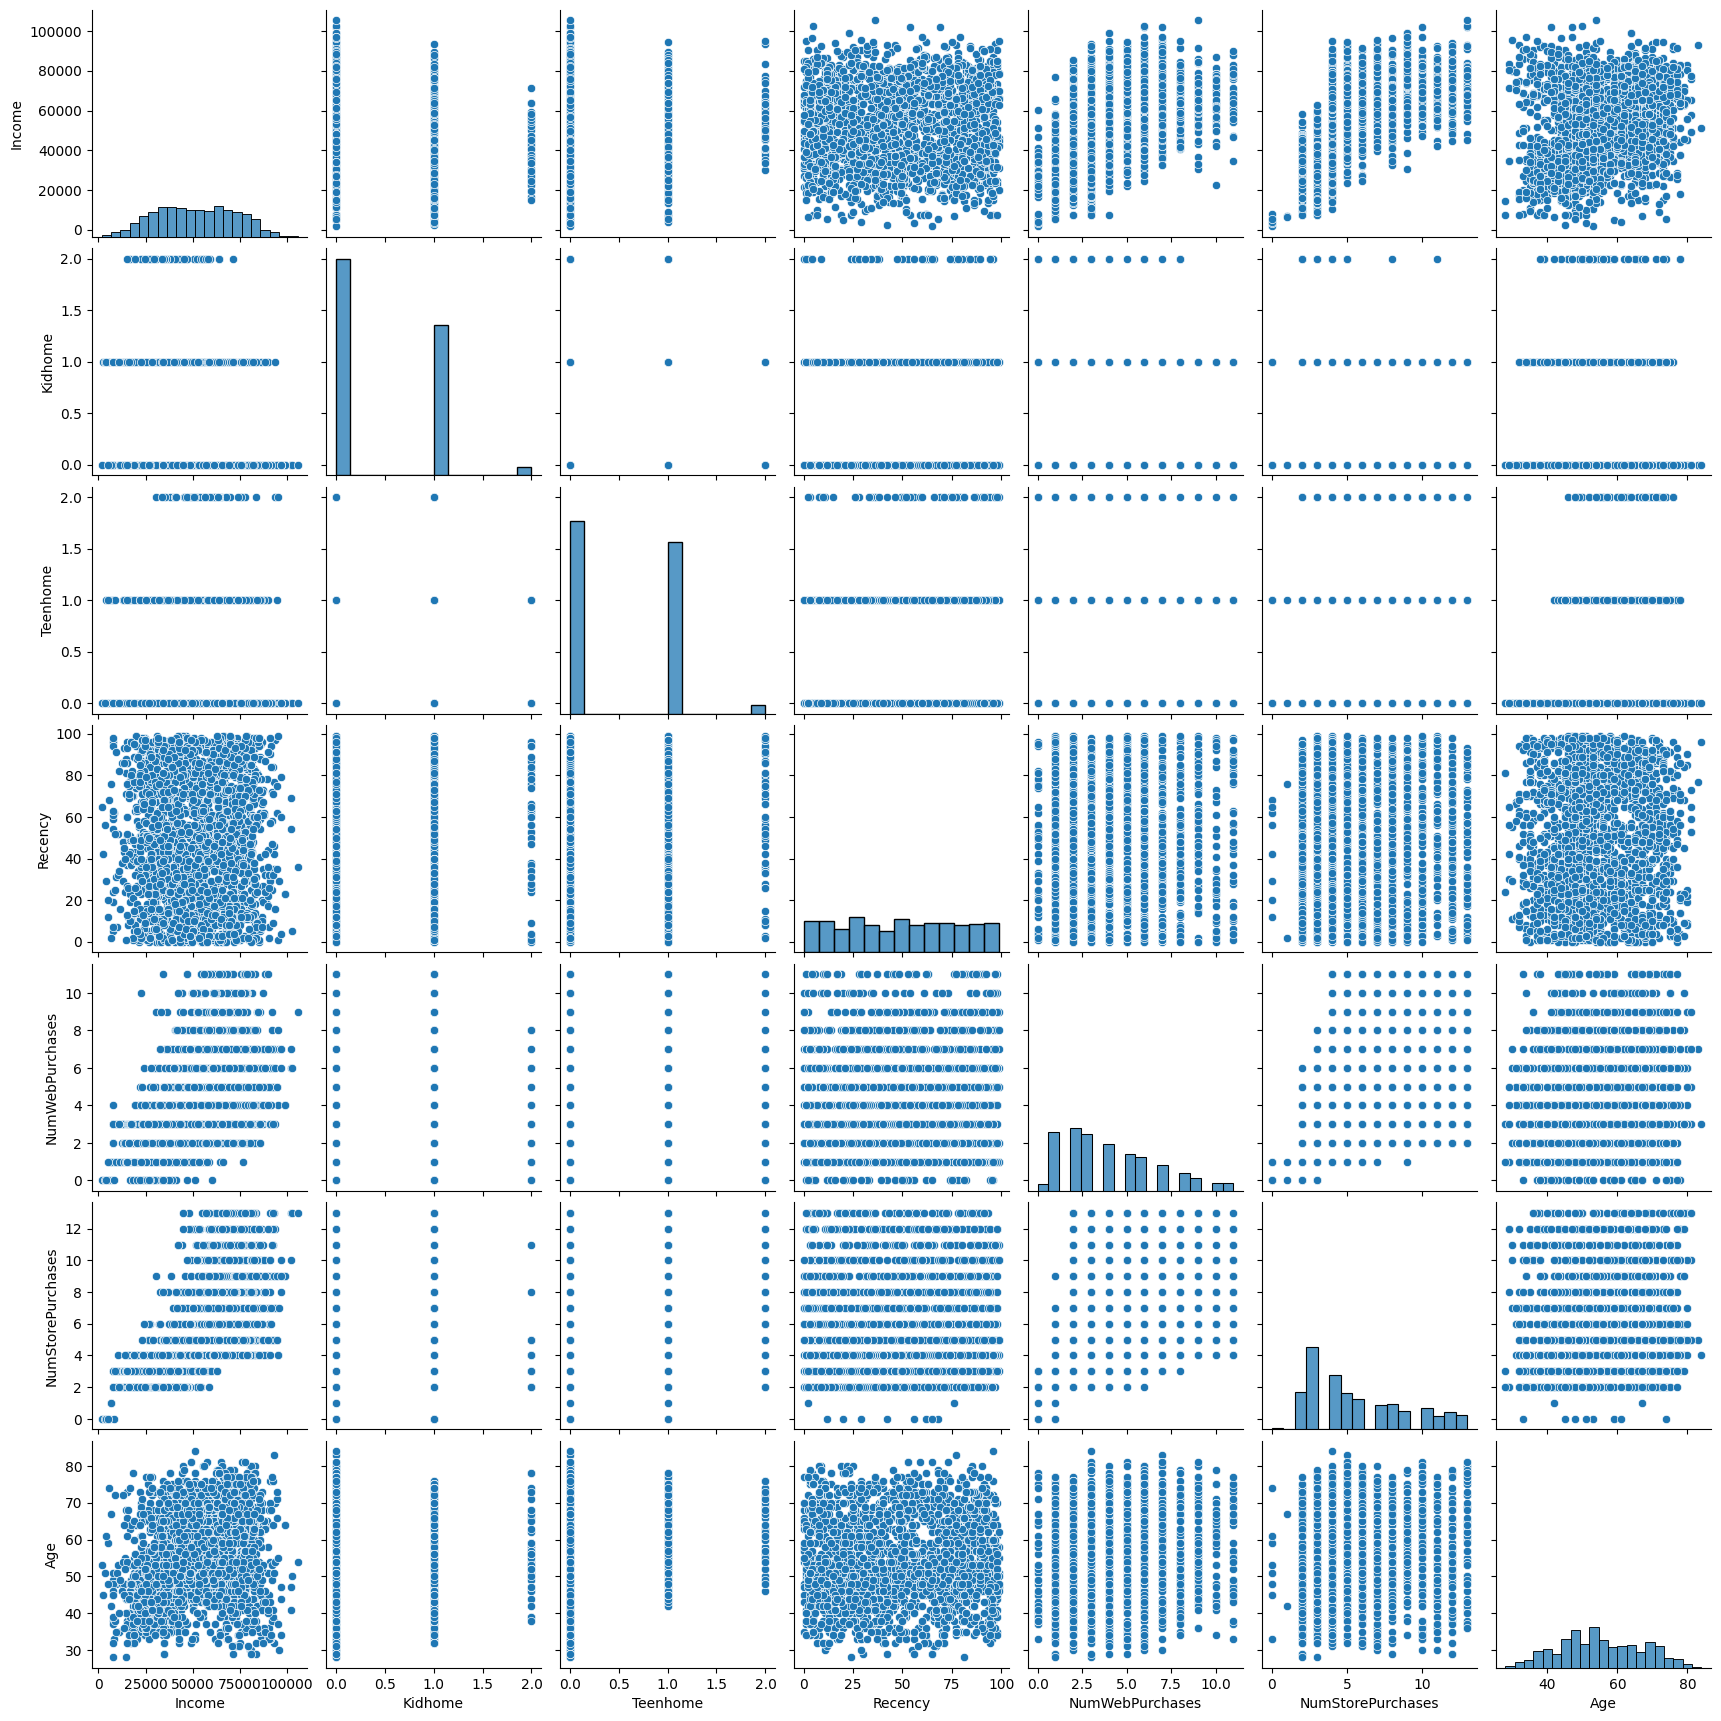

In [13]:
sns.pairplot(prepare_data[num_columns])
None

### Cat columns

In [14]:
cat_num_columns = ["Income",
               "Recency",
               "NumWebPurchases",
               "NumStorePurchases",           
               "Age"]

cat_columns = ["Kidhome",
               "Teenhome"]

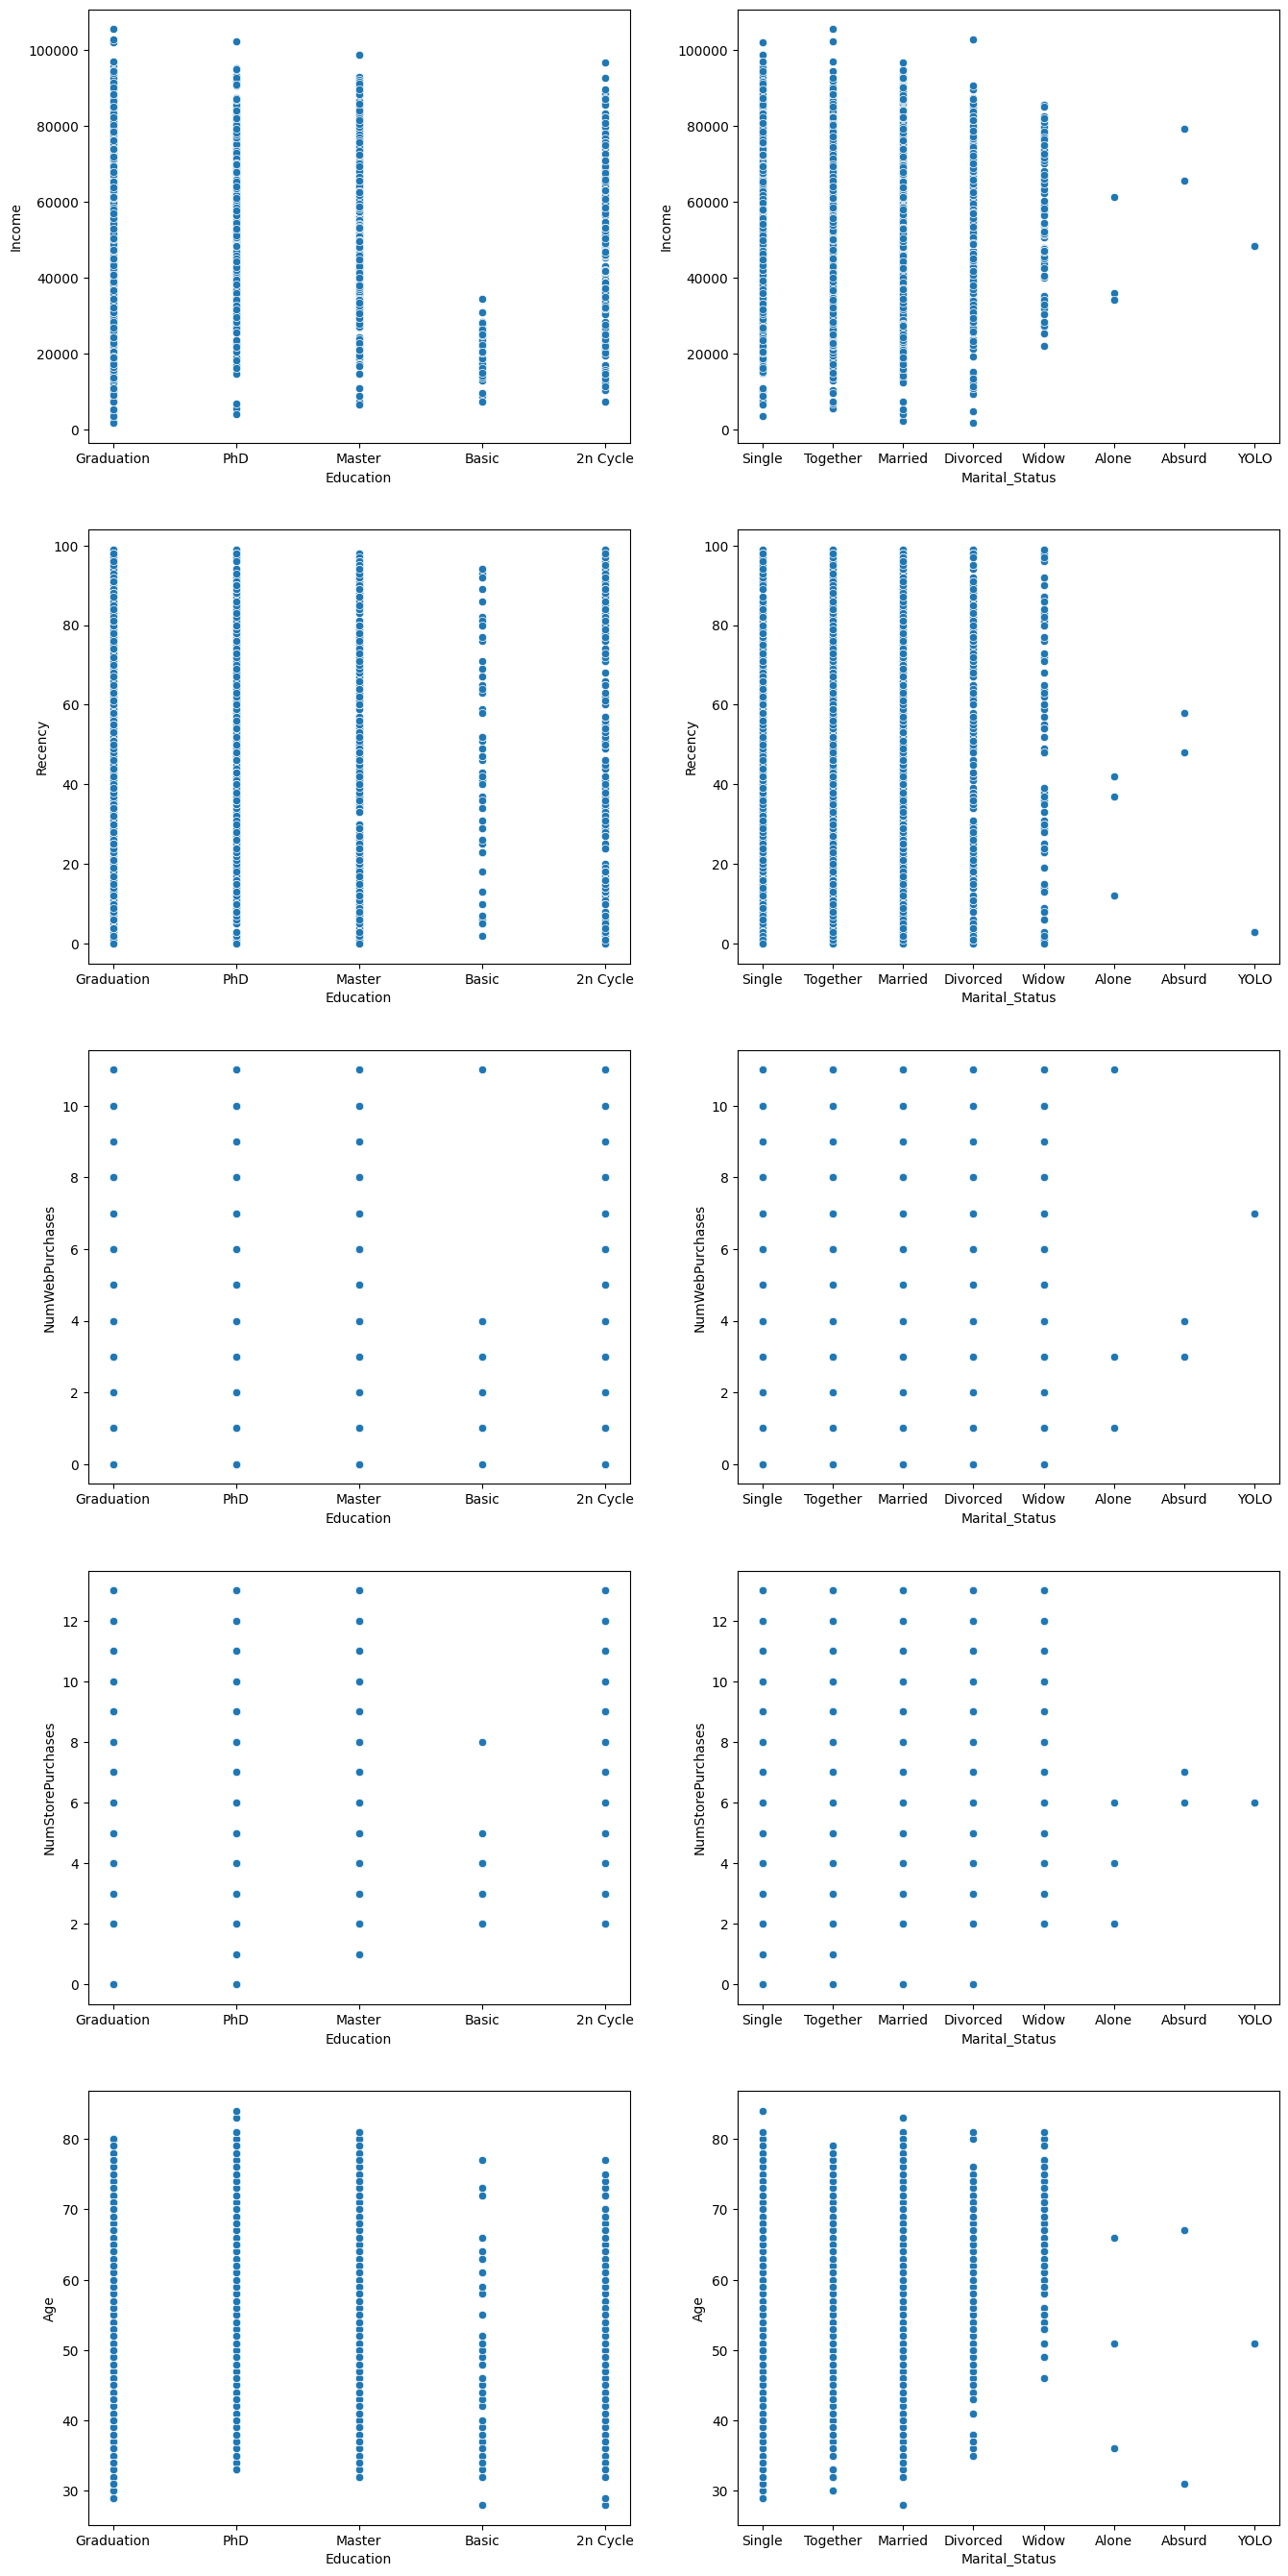

In [15]:
fig, axes = plt.subplots(len(cat_num_columns), 2, figsize=(16, 34))
for cat_idx, cat in enumerate(["Education", "Marital_Status"]):
    for num_idx, num in enumerate(cat_num_columns):
        sns.scatterplot(ax=axes[num_idx, cat_idx], x=prepare_data[cat], y=prepare_data[num])
fig.show()
None

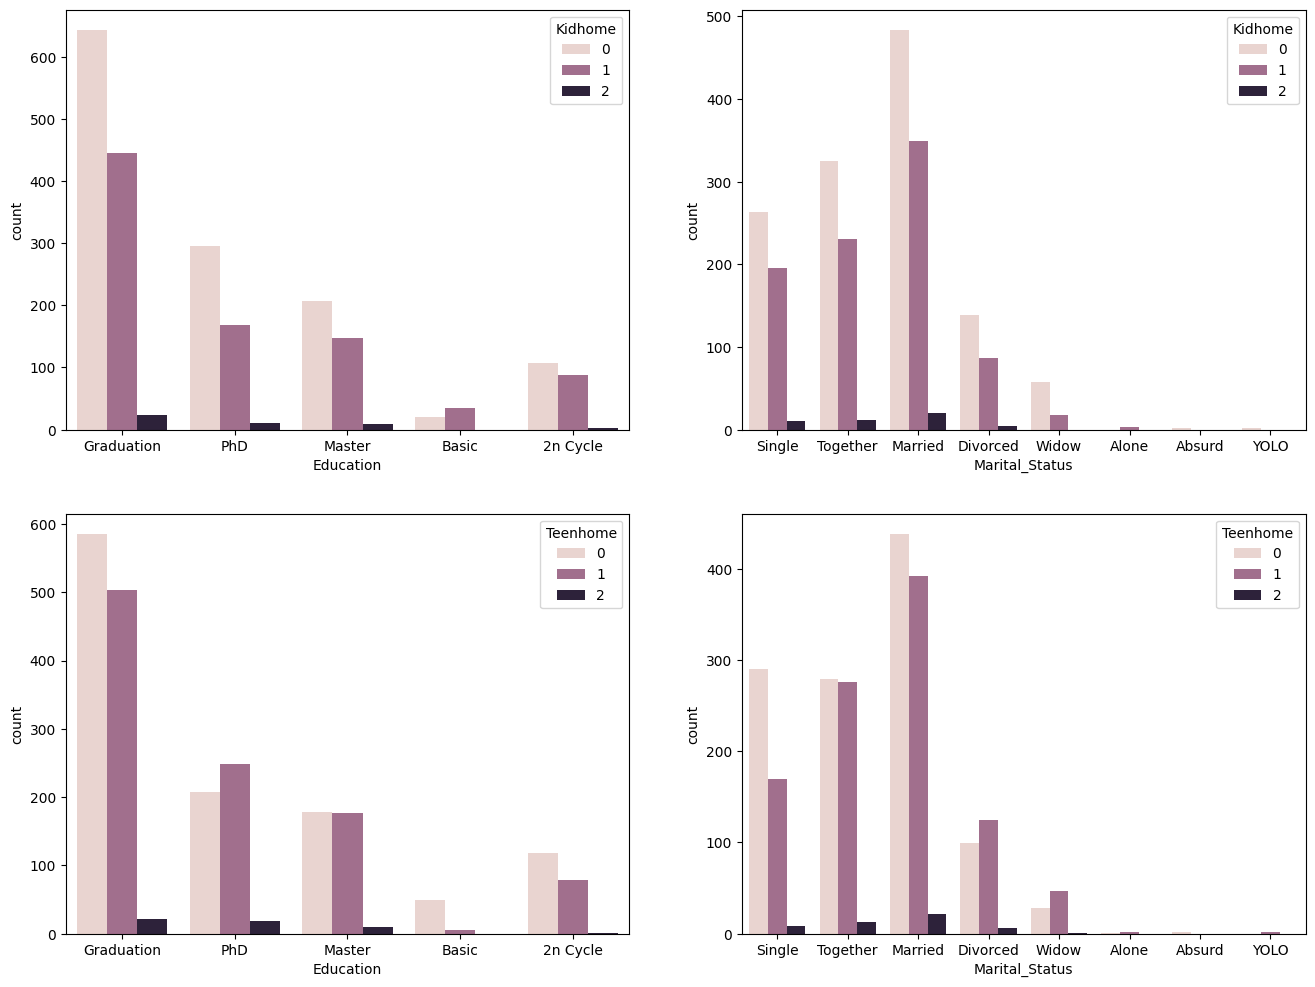

In [16]:
fig, axes = plt.subplots(len(cat_columns), 2, figsize=(16, 12))
for cat_idx, cat in enumerate(["Education", "Marital_Status"]):
    for num_idx, num in enumerate(cat_columns):
        sns.countplot(ax=axes[num_idx, cat_idx], data=prepare_data, x=cat, hue=num)
fig.show()
None

### Conclusion

Рассмотрим матрицу ковариаций  
* Есть положительная зависимость между зарплатой и количеством покупок   
* Есть отрицательная зависимость между зарплатой и количеством детей   
* Есть положительная зависимость между количеством покупок в интеренете и магазине 

Рассмотрим pairplot  
* Корреляции с колонкой Income подтверждаются
* Графики зарплаты и возраста от количества подростков очень похожи
* В магазинах в основном делают 3-5 покупок, а остальных людей примерно поровну
* В интернете количество покупок на одного человека равномерно уменьшается

Рассмотрим категориальные столбцы
* Люди без образования получают меньше зарплату

## Task 3 (hard)

In [17]:
pass